In [28]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Plate dimension in mm

width = 100.0
height = 100.0

# number of grid points 
nx = 50
ny = 50

dx = width / 50
dy = height / 50 



# initial temperatures 

T_init = 20.0
T_edge = 100.0

# create temperature grid 

T = np.ones((nx,ny)) * T_init
T[0,:]  = T_edge
T[:,0]  = T_edge 
T[-1,:] = T_edge
T[:,-1] = T_edge


In [37]:

alpha = 1.88 # Thermal diffusivity (mm^2/s) https://en.wikipedia.org/wiki/Thermal_diffusivity
print(alpha)
# Time-stepping parameters
dt = 0.1 
total_time = 50.0  # Total simulation time (s)
num_steps = int(total_time / dt)

def update_temperature(T, dx, dy, dt, alpha):
    # Create a copy of the temperature array to avoid overwriting values
    T_new = T.copy()
    
    # Update the temperature for each interior point
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[j, i] = T[j, i] + alpha * dt * (
                (T[j, i+1] - 2*T[j, i] + T[j, i-1]) / dx**2 +
                (T[j+1, i] - 2*T[j, i] + T[j-1, i]) / dy**2)
    
    # Apply boundary conditions (optional if boundaries are static)
    # T_new[0, :] = T_edge  # Top edge
    # T_new[:, 0] = T_edge  # Left edge
    # T_new[-1, :] = T_edge  # Bottom edge
    # T_new[:, -1] = T_edge  # Right edge
    
    return T_new

1.88


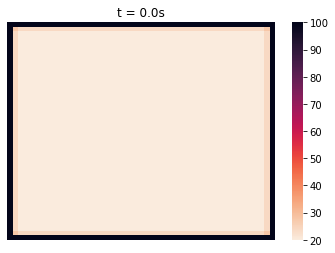

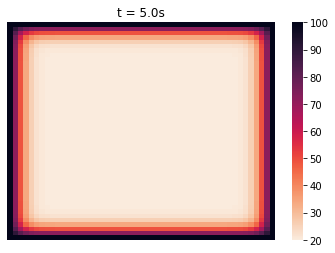

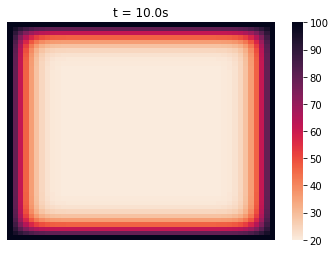

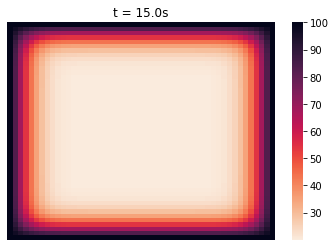

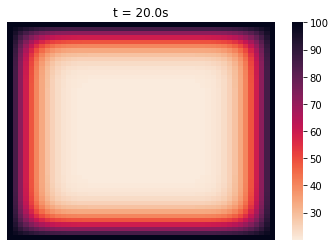

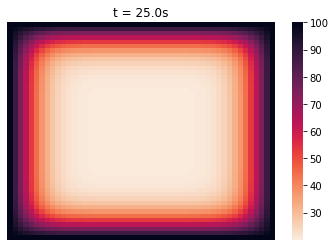

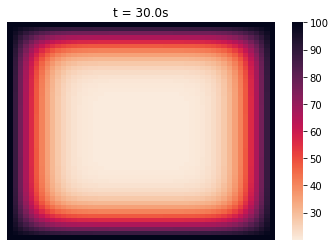

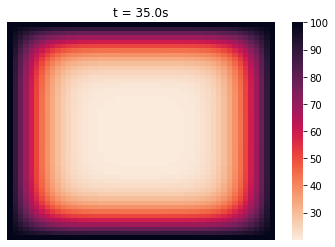

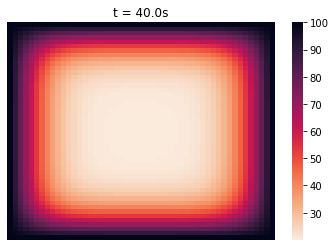

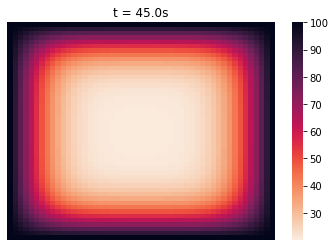

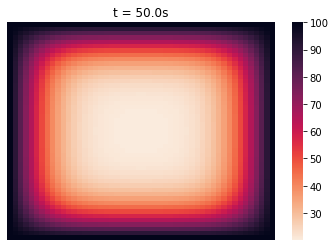

In [39]:
T = np.ones((nx,ny)) * T_init
T[0,:]  = T_edge
T[:,0]  = T_edge 
T[-1,:] = T_edge
T[:,-1] = T_edge

for step in range(num_steps+1):
    T = update_temperature(T, dx, dy, dt, alpha)
    # Optional: Visualization at specific time steps
    if step % 50 == 0:  # Adjust the frequency of visualization as needed
        # plt.imshow(T, origin='lower', cmap=cm.hot, extent=(0, width, 0, height))
        # plt.colorbar(label='Temperature (°C)')
        # plt.title(f'Temperature at time = {step*dt:.2f} s')
        # plt.xlabel('X Position (m)')
        # plt.ylabel('Y Position (m)')
        # plt.show()
        ax = sns.heatmap(T, cmap= "rocket_r", vmax = 100,yticklabels=False,xticklabels=False)
        plt.title("t = " + str(step*dt) + "s")
        plt.show()

plt.show()
